# Rule: **add_electricity**

**Outputs**

- resources/networks/`base_s_{clusters}_elec.nc`

In [40]:
######################################## Parameters

### Run
name = ''
prefix = ''

### Network
clusters = 5

In [41]:
##### Import packages
import pypsa
import pandas as pd
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt
import yaml
import os 
import sys
import numpy as np


##### Import local functions
sys.path.append(os.path.abspath(os.path.join('..')))
import functions as xp


##### Read params.yaml
with open('../params.yaml', 'r') as configfile:
    params = yaml.safe_load(configfile)


##### Ignore warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


##### Region files
file_regions_onshore = f'regions_onshore_base_s_{clusters}.geojson'
file_regions_offshore = f'regions_offshore_base_s_{clusters}.geojson'
path_regions = f'{params['rootpath']}/resources/{prefix}/{name}/'
gdf_regions_onshore = gpd.read_file(path_regions+file_regions_onshore)
gdf_regions_offshore = gpd.read_file(path_regions+file_regions_offshore)


##### NUTS files (provided by the user, used here to display results at NUTS level. The files must contain at least the columns 'NUTS_ID' and 'geometry')
file_NUTS2 = 'NUTS2_ES.geojson'
file_NUTS3 = 'NUTS3_ES.geojson'
path_NUTS = f'{params['rootpath']}/data_ES/nuts/'
gdf_NUTS2 = gpd.read_file(path_NUTS+file_NUTS2)
gdf_NUTS3 = gpd.read_file(path_NUTS+file_NUTS3)


## `base_s_{clusters}_elec.nc`

Load the network and show its components.

In [42]:
file = f'base_s_{clusters}_elec.nc'
path = f'{params['rootpath']}/resources/{prefix}/{name}/networks/'

n = pypsa.Network(path+file)

n

INFO:pypsa.io:Imported network base_s_5_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


Unnamed PyPSA Network
---------------------
Components:
 - Bus: 15
 - Carrier: 18
 - Generator: 29
 - Line: 5
 - Link: 21
 - Load: 5
 - StorageUnit: 9
 - Store: 10
Snapshots: 8760

Plot the network.

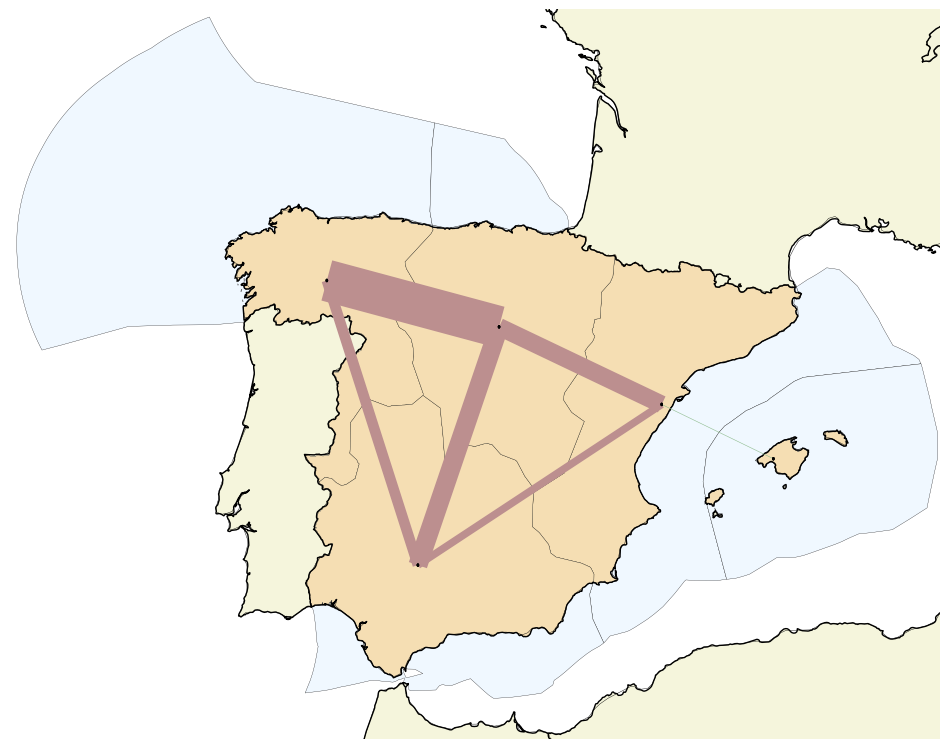

In [43]:
#################### Parameters
line_widths = 1*n.lines.s_nom / 1e3
link_widths = 1*n.links.p_nom / 1e3



#################### Figure
fig_size = [12,12]
crs = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=fig_size, subplot_kw={'projection': crs})


### Add network
n.plot(ax=ax, 
       line_widths=line_widths, 
       link_widths=link_widths, 
       bus_sizes=params['bus_sizes'], 
       bus_colors=params['bus_colors'], 
       boundaries=params['boundaries_offshore'])

### Add regions_onshore
xp.map_add_region(ax, gdf_regions_onshore, params['map_add_region'])

### Add regions_offshore
xp.map_add_region(ax, gdf_regions_offshore, params['map_add_region'], is_offshore=True)

### Add map features
xp.map_add_features(ax, params['map_add_features'])

### Variable: `n.buses`

Place `n.buses` in a dataFrame and show its content.

In [44]:
bb = n.buses

bb.head()

,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network,country,substation_lv,location,substation_off
Bus,,,,,,,,,,,,,,,,
ES0 0,380.0,,-7.066929,42.541010,AC,,1.0,0.0,inf,Slack,,,ES,1.0,,1.0
ES0 1,380.0,,0.260430,40.502609,AC,,1.0,0.0,inf,PQ,,,ES,1.0,,1.0
ES0 2,380.0,,-5.074358,37.859463,AC,,1.0,0.0,inf,PQ,,,ES,1.0,,1.0
ES0 3,380.0,,-3.298471,41.778615,AC,,1.0,0.0,inf,PQ,,,ES,1.0,,1.0
ES1 0,380.0,,2.704258,39.609088,AC,,1.0,0.0,inf,Slack,,,ES,1.0,,1.0


### Variable: `n.carriers`

Place `n.carriers` in a dataFrame and show its content.

In [45]:
cc = n.carriers

cc.head()

,co2_emissions,color,nice_name,max_growth,max_relative_growth
Carrier,,,,,
AC,0.000,#70af1d,AC,inf,0.0
DC,0.000,#8a1caf,DC,inf,0.0
CCGT,0.198,#a85522,Combined-Cycle Gas,inf,0.0
biomass,0.000,#baa741,biomass,inf,0.0
nuclear,0.000,#ff8c00,nuclear,inf,0.0


### Variable: `n.generators`

Place `n.generators` in a dataFrame and show its content.

In [46]:
gg = n.generators

gg.head()

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
ES0 0 CCGT,ES0 0,PQ,,1959.580,0.0,True,1959.580,inf,0.0,1.000,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
ES0 0 biomass,ES0 0,PQ,,227.000,0.0,True,227.000,inf,0.0,1.000,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
ES0 1 CCGT,ES0 1,PQ,,10933.604,0.0,True,10933.604,inf,0.0,1.000,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
ES0 1 nuclear,ES0 1,PQ,,2109.200,0.0,False,2109.200,inf,0.0,0.883,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
ES0 2 CCGT,ES0 2,PQ,,6454.265,0.0,True,6454.265,inf,0.0,1.000,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


#### Summary

What is the aggregated capacity per carrier? 

How many buses have generators for each carrier? How many of them have zero capacity?

In [47]:
gg.groupby('carrier').agg(
    Total_capacity=pd.NamedAgg(column='p_nom', aggfunc='sum'),
    Buses=pd.NamedAgg(column='p_nom', aggfunc='size'),
    Buses_zero_capacity=pd.NamedAgg(column='p_nom', aggfunc=lambda x: (x == 0).sum()),
    Buses_non_zero_capacity=pd.NamedAgg(column='p_nom', aggfunc=lambda x: (x != 0).sum()),
)

,Total_capacity,Buses,Buses_zero_capacity,Buses_non_zero_capacity
carrier,,,,
CCGT,28271.244000,5,0,5
biomass,483.000000,4,0,4
nuclear,3112.600000,2,0,2
offwind-float,5.000000,5,0,5
onwind,26814.190000,5,0,5
ror,277.008247,3,0,3
solar,10135.588000,5,0,5


#### Maps

Plot a map showing a particular feature of a generation carrier at each region.

Then, show another map with the same information aggregated to a certain NUTS level (weighted with ovelap area).

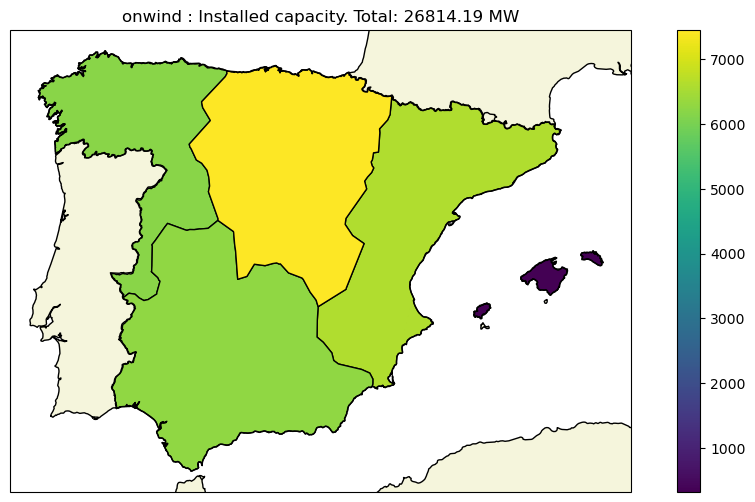

In [77]:
#################### Parameters

### Select carrier
carrier = 'onwind'

### Select feature (uncomment one of the following):
# feature = 'area' 
feature = 'p_nom'
# feature = 'p_nom_density'
# feature = 'p_nom_max'
# feature = 'p_nom_max_density'
#feature = 'p_nom_max_ratio'



#################### Local params
params_local = {}
params_local['vmin'] = ''   # Leave empty for automatic value 
params_local['vmax'] = ''   # Leave empty for automatic value



#################### Figure
fig_size = [12,6]
crs = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=fig_size, subplot_kw={'projection': crs})


### Define gdf_regions
if 'off' in carrier:
    gdf_regions = gdf_regions_offshore
    is_offshore = True
else:
    gdf_regions = gdf_regions_onshore
    is_offshore = False


### Add map features
xp.map_add_features(ax, params['map_add_features'])

### Add network feature at regions
xp.map_network_generators(carrier, n, feature, ax, gdf_regions, params['map_network_generators'], params_local)

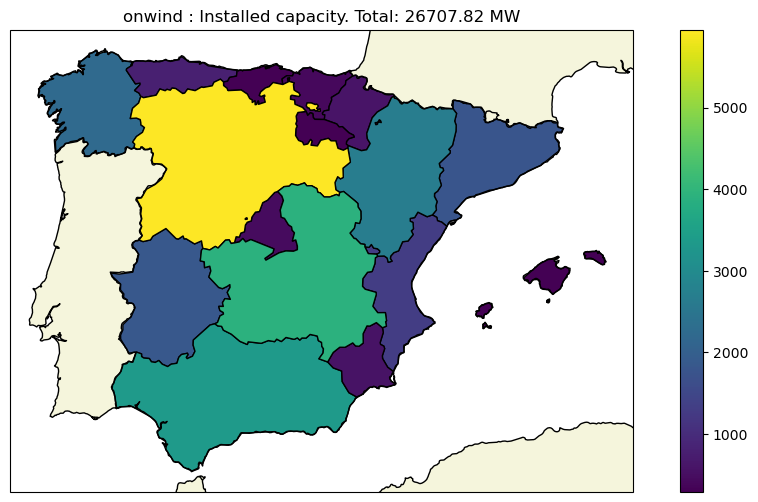

In [49]:
#################### Parameters

### Select NUTS level
NUTS_level =2



#################### Local params
params_local = {}
params_local['vmin'] = ''   # Leave empty for automatic value 
params_local['vmax'] = ''   # Leave empty for automatic value



if 'off' in carrier:
    print('Aggregation at NUTS level for offshore is not possible')
else:
    #################### Figure
    fig_size = [12,6]
    crs = ccrs.PlateCarree()

    fig, ax = plt.subplots(figsize=fig_size, subplot_kw={'projection': crs})


    ### Define gdf_regions
    gdf_regions = gdf_regions_onshore
    is_offshore = False


    ### Define NUTS file
    if NUTS_level==2:
        gdf_NUTS = gdf_NUTS2
    if NUTS_level==3:
        gdf_NUTS = gdf_NUTS3    


    ### Add map features
    xp.map_add_features(ax, params['map_add_features'])

    ### Add network feature aggregated at NUTS regions
    xp.map_NUTS_generators(carrier, n, f'{feature}_NUTS', ax, gdf_regions, gdf_NUTS, params['map_NUTS_generators'], params_local)


#### Costs

What is the capital cost of generators?

Carriers ommitted: ['CCGT', 'biomass', 'nuclear', 'ror']
Capital cost for onwind is: 116774.05 EUR/MW·year
Capital cost for solar is: 53617.47 EUR/MW·year
Average capital cost for offwind-float is: 245842.73 EUR/MW·year


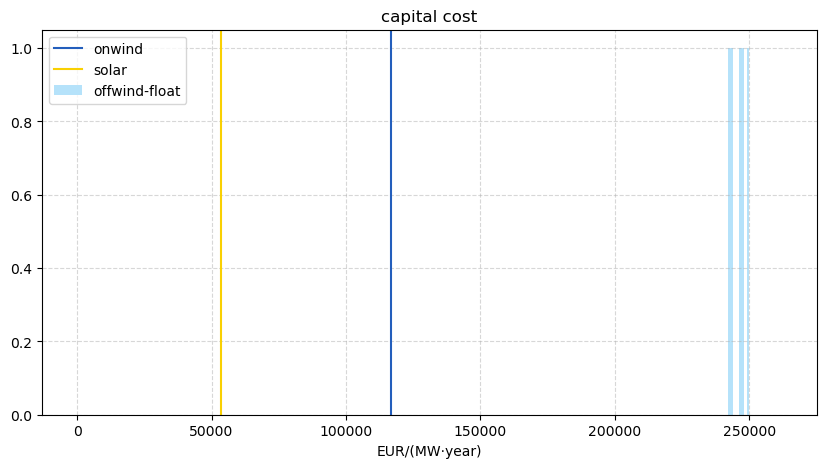

In [50]:
#################### Parameters

### Select carriers
carrier_list = ['onwind', 'solar', 'offwind-float']



#################### Figure
fig_size = [10,5]
fig, ax = plt.subplots(1,1,figsize=fig_size)

# Give a message with the carriers not considered
carrier_all = gg['carrier'].unique().tolist()
carrier_excluded = [carrier for carrier in carrier_all if carrier not in carrier_list]
print(f'Carriers ommitted: {carrier_excluded}')

# Define bins
minimo = 0 # 0.95 * gg.loc[ gg['carrier'].isin(carrier_list), 'capital_cost'].min()
maximo = 1.05 * gg.loc[ gg['carrier'].isin(carrier_list), 'capital_cost'].max()
ancho = 1000

bins = np.arange(minimo, maximo, 1000)

# Define colors
tech_colors = n.carriers['color']


for carrier in carrier_list:

    ##### Filter the carrier
    df = gg[gg['carrier']==carrier]


    ##### Only single cost for the carrier
    if df['capital_cost'].round(2).nunique()==1:

        valor = df['capital_cost'].unique()[0]

        ax.axvline(x=valor, label=carrier, color = tech_colors[carrier])

        print(f'Capital cost for {carrier} is: {valor:.2f} EUR/MW·year')

    ##### Different costs for the carrier
    else:
        plt.hist(df['capital_cost'], bins=bins, 
                 edgecolor='none', color = tech_colors[carrier],
                 label=carrier, alpha=1)
        
        valor = df['capital_cost'].mean()
        print(f'Average capital cost for {carrier} is: {valor:.2f} EUR/MW·year')


ax.set_title('capital cost')
ax.set_xlabel('EUR/(MW·year)')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

### Variable: `n.generators_t[p_max_pu]`

Place `n.generators_t[p_max_pu]` in a dataFrame and show its content.

In [51]:
ggt_pmaxpu = n.generators_t['p_max_pu']

ggt_pmaxpu.head()

Generator,ES0 0 offwind-float,ES0 0 onwind,ES0 0 ror,ES0 0 solar,ES0 1 offwind-float,ES0 1 onwind,ES0 1 ror,ES0 1 solar,ES0 2 offwind-float,ES0 2 onwind,ES0 2 solar,ES0 3 offwind-float,ES0 3 onwind,ES0 3 solar,ES1 0 offwind-float,ES1 0 onwind,ES1 0 ror,ES1 0 solar
snapshot,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,0.837367,0.241844,0.225440,0.0,0.669598,0.207433,0.225440,0.0,0.391418,0.067387,0.0,0.805653,0.266939,0.0,0.865229,0.668983,0.225440,0.0
2013-01-01 01:00:00,0.858087,0.223229,0.211488,0.0,0.674520,0.199089,0.211488,0.0,0.456629,0.068770,0.0,0.813069,0.237285,0.0,0.869806,0.670255,0.211488,0.0
2013-01-01 02:00:00,0.865779,0.203483,0.200643,0.0,0.667343,0.198184,0.200643,0.0,0.489607,0.066258,0.0,0.850285,0.221227,0.0,0.876442,0.661387,0.200643,0.0
2013-01-01 03:00:00,0.863210,0.171801,0.188995,0.0,0.651383,0.205253,0.188995,0.0,0.542102,0.065292,0.0,0.860943,0.194462,0.0,0.877224,0.635145,0.188995,0.0
2013-01-01 04:00:00,0.835654,0.141448,0.181329,0.0,0.638865,0.228822,0.181329,0.0,0.611400,0.061451,0.0,0.866481,0.187483,0.0,0.878844,0.623896,0.181329,0.0


#### Time series

How do the potential generation time series look like?

Text(0, 0.5, '')

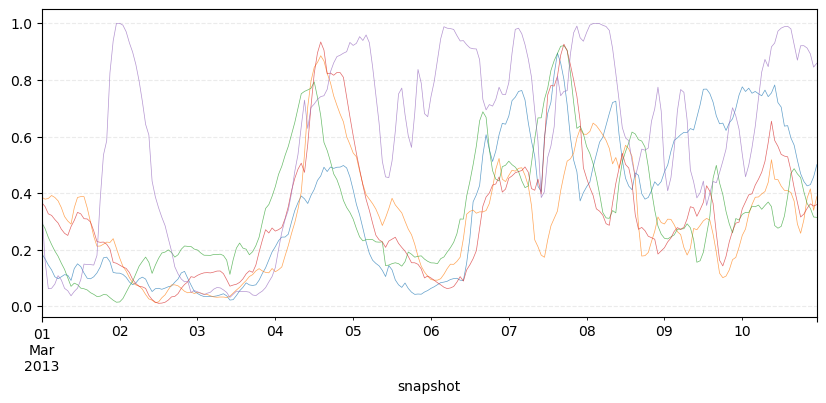

In [52]:
#################### Parameters
carrier = 'onwind'

start = '2013-03-01'
end = '2013-03-10'



#################### Figure
fig_size = [10,4]
fig, ax = plt.subplots(figsize=fig_size)

ggt_pmaxpu.loc[start:end].filter(like=carrier).plot(ax=ax, alpha=.7, legend=False, linewidth=.5)

ax.grid(True, linestyle='--', alpha=0.25)
ax.set_ylabel('')

#### Maps

Plot a map showing a particular feature of the potential generation for a carrier at each region.

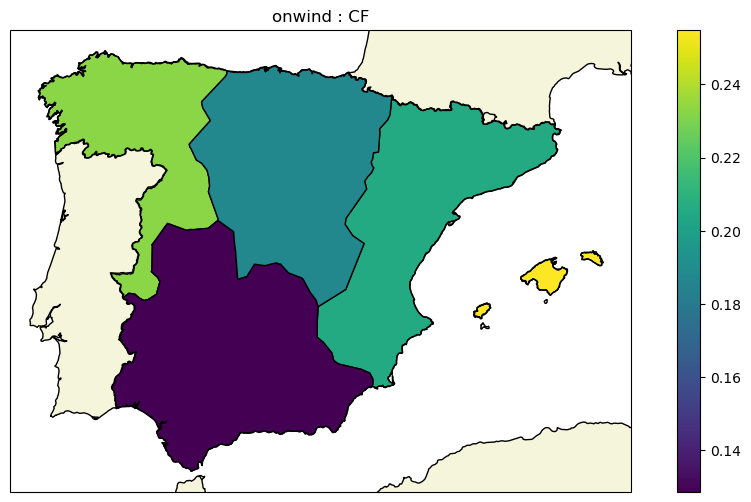

In [ ]:
#################### Parameters

##### Select carrier:
carrier = 'onwind'

##### Select feature (uncomment one of the following):
feature = 'CF' 



#################### Local params
params_local = {}
params_local['vmin'] = ''   # Leave empty for automatic value 
params_local['vmax'] = ''   # Leave empty for automatic value



#################### Figure
fig_size = [12,6]
crs = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=fig_size, subplot_kw={'projection': crs})


### Define gdf_regions
if 'off' in carrier:
    gdf_regions = gdf_regions_offshore
    is_offshore = True
else:
    gdf_regions = gdf_regions_onshore
    is_offshore = False


### Add map features
xp.map_add_features(ax, params['map_add_features'])

### Add network feature at regions
xp.map_network_generatorst_pmaxpu(carrier, n, feature, ax, gdf_regions, params['map_network_generatorst_pmaxpu'], params_local)

### Variable: `n.lines`

Place `n.lines` in a dataFrame and show its content.

In [54]:
ln = n.lines

ln.head()

,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt,i_nom,dc,v_nom
Line,,,,,,,,,,,,,,,,,,,,,
0,ES0 0,ES0 2,Al/St 240/40 4-bundle 380.0,27.950263,3.648891,0.0,0.011641,7641.461753,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.58,0.0,380
1,ES0 0,ES0 3,Al/St 240/40 4-bundle 380.0,3.571913,0.508339,0.0,0.032184,29940.230260,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.58,0.0,380
2,ES0 1,ES0 2,Al/St 240/40 4-bundle 380.0,44.736473,5.455670,0.0,0.007096,5362.429300,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.58,0.0,380
3,ES0 1,ES0 3,Al/St 240/40 4-bundle 380.0,8.759159,1.237645,0.0,0.013769,12691.082677,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.58,0.0,380
4,ES0 2,ES0 3,Al/St 240/40 4-bundle 380.0,10.409718,1.537994,0.0,0.022873,13674.194716,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.58,0.0,380


How is the distribution of line lengths?

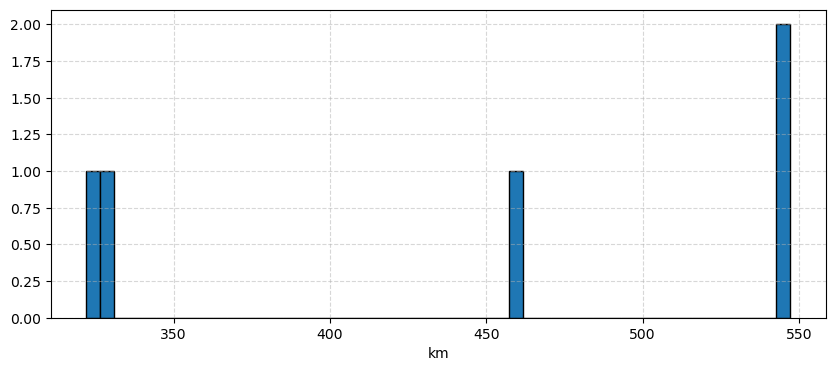

In [55]:
#################### Parameters
bins = 50



#################### Figure
fig_size = [10,4]
fig, ax = plt.subplots(figsize=fig_size)


ax.hist(ln['length'], bins=bins, edgecolor='black')

ax.set_xlabel('km')
ax.grid(True, linestyle='--', alpha=0.5)

How is the relationship between line capital costs and line length?

The ratio values of capital cost vs. length  are [52.51] EUR/(MW·km)


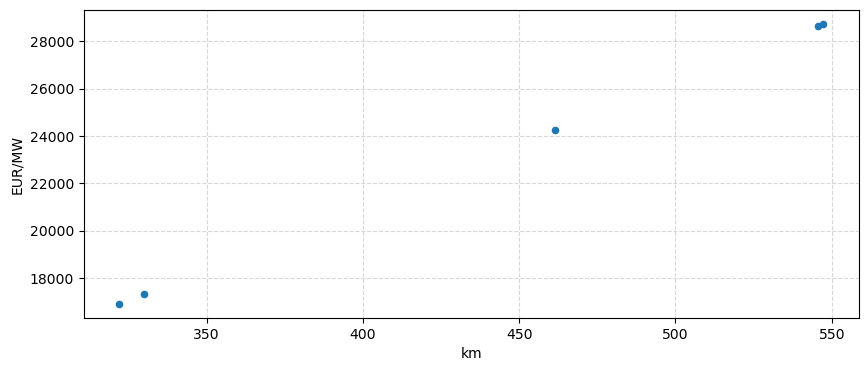

In [56]:
#################### Figure
fig_size = [10,4]
fig, ax = plt.subplots(figsize=fig_size)


ln.plot(ax=ax, kind='scatter', x='length', y='capital_cost')

ax.set_xlabel('km')
ax.set_ylabel('EUR/MW')
ax.grid(True, linestyle='--', alpha=0.5)


ratio = ln['capital_cost']/ln['length']

print(f'The ratio values of capital cost vs. length  are {ratio.round(2).unique()} EUR/(MW·km)')

### Variable: `n.links`

Place `n.links` in a dataFrame and show its content.

In [57]:
lk = n.links

lk.head()

,bus0,bus1,type,carrier,efficiency,active,build_year,lifetime,p_nom,p_nom_mod,...,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt,underground,geometry,tags,dc,under_construction,underwater_fraction,voltage
Link,,,,,,,,,,,,,,,,,,,,,
relation/17631956-250-DC,ES0 1,ES1 0,,DC,1.0000,True,0,inf,400.0,0.0,...,1.0,1.0,0.0,1.0,LINESTRING (-0.2354476169104305 39.64108480222...,relation/17631956,1.0,0.0,0.98193,250.0
ES0 0 H2 Electrolysis,ES0 0,ES0 0 H2,,H2 electrolysis,0.6217,True,0,inf,0.0,0.0,...,1.0,1.0,0.0,NaN,,,NaN,NaN,NaN,NaN
ES0 1 H2 Electrolysis,ES0 1,ES0 1 H2,,H2 electrolysis,0.6217,True,0,inf,0.0,0.0,...,1.0,1.0,0.0,NaN,,,NaN,NaN,NaN,NaN
ES0 2 H2 Electrolysis,ES0 2,ES0 2 H2,,H2 electrolysis,0.6217,True,0,inf,0.0,0.0,...,1.0,1.0,0.0,NaN,,,NaN,NaN,NaN,NaN
ES0 3 H2 Electrolysis,ES0 3,ES0 3 H2,,H2 electrolysis,0.6217,True,0,inf,0.0,0.0,...,1.0,1.0,0.0,NaN,,,NaN,NaN,NaN,NaN


Place DC links in a dataFrame and show its content.

In [58]:
lk_DC = lk.loc[lk['carrier']=='DC']

lk_DC.head()

,bus0,bus1,type,carrier,efficiency,active,build_year,lifetime,p_nom,p_nom_mod,...,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt,underground,geometry,tags,dc,under_construction,underwater_fraction,voltage
Link,,,,,,,,,,,,,,,,,,,,,
relation/17631956-250-DC,ES0 1,ES1 0,,DC,1.0,True,0,inf,400.0,0.0,...,1.0,1.0,0.0,1.0,LINESTRING (-0.2354476169104305 39.64108480222...,relation/17631956,1.0,0.0,0.98193,250.0


How is the distribution of DC link lengths?

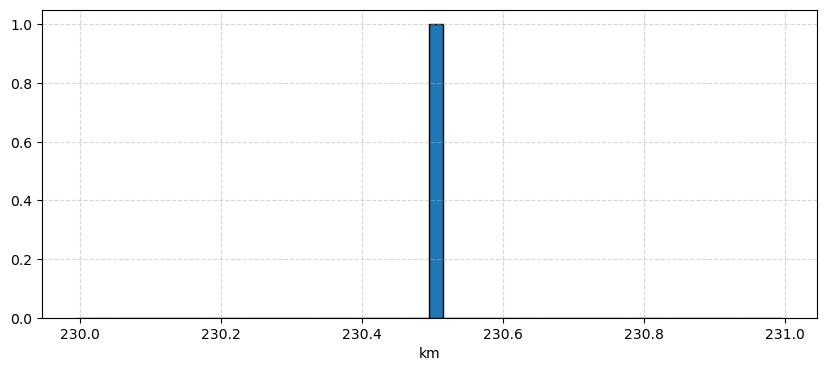

In [59]:
#################### Parameters
bins = 50



#################### Figure
fig_size = [10,4]
fig, ax = plt.subplots(figsize=fig_size)


ax.hist(lk_DC['length'], bins=bins, edgecolor='black')

ax.set_xlabel('km')
ax.grid(True, linestyle='--', alpha=0.5)

How is the relationship between DC link capital costs and link length?

The ratio values of capital cost vs. length  are [166.45] EUR/km


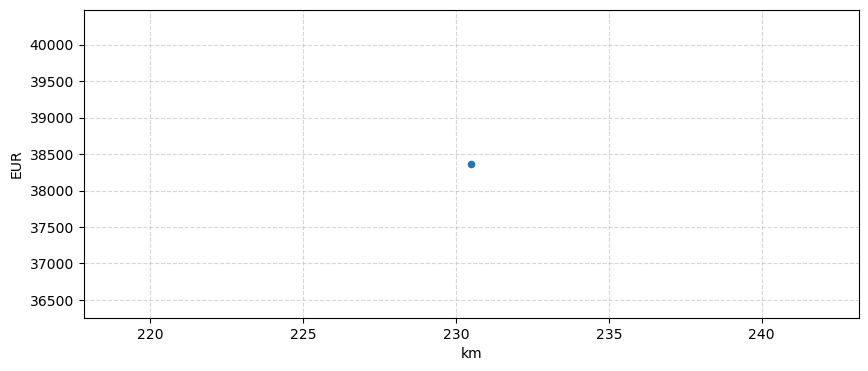

In [60]:
#################### Figure
fig_size = [10,4]
fig, ax = plt.subplots(figsize=fig_size)


lk_DC.plot(ax=ax, kind='scatter', x='length', y='capital_cost')

ax.set_xlabel('km')
ax.set_ylabel('EUR')
ax.grid(True, linestyle='--', alpha=0.5)


ratio = lk_DC['capital_cost']/lk_DC['length']

print(f'The ratio values of capital cost vs. length  are {ratio.round(2).unique()} EUR/km')

### Variable: `n.loads_t[p_set]`

Place `n.loads_t[p_set]` in a dataFrame and show its content.

In [61]:
lot_pset = n.loads_t['p_set']

lot_pset.head()

Load,ES0 0,ES0 1,ES0 2,ES0 3,ES1 0
snapshot,,,,,
2013-01-01 00:00:00,3029.559776,6367.153831,4979.055214,7475.683083,1122.548050
2013-01-01 01:00:00,2819.624252,5925.937325,4634.027962,6957.650261,1044.760269
2013-01-01 02:00:00,2625.512978,5517.978310,4315.007797,6478.664986,972.835892
2013-01-01 03:00:00,2503.534081,5261.618233,4114.536591,6177.672287,927.638847
2013-01-01 04:00:00,2458.830482,5167.665680,4041.066597,6067.362549,911.074730


#### Time series

How do the load time series look like?

Text(0, 0.5, 'MW')

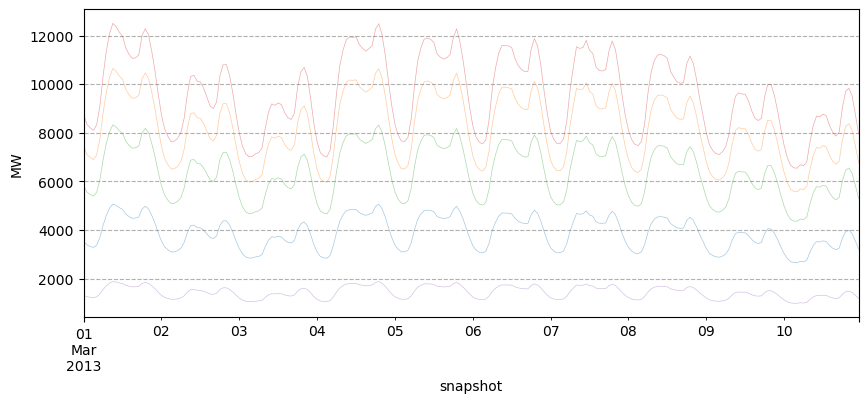

In [62]:
#################### Parameters
start = '2013-03-01'
end = '2013-03-10'



#################### Figure
fig_size = [10,4]
fig, ax = plt.subplots(figsize=fig_size)

lot_pset.loc[start:end].plot(ax=ax, alpha=.4, legend=False, linewidth=.5)

ax.grid(True, linestyle='--', alpha=1)
ax.set_ylabel('MW')

#### Maps

Plot a map showing a particular feature of the load at each region.

Then, show another map with the same information aggregated to a certain NUTS level (weighted with ovelap area).

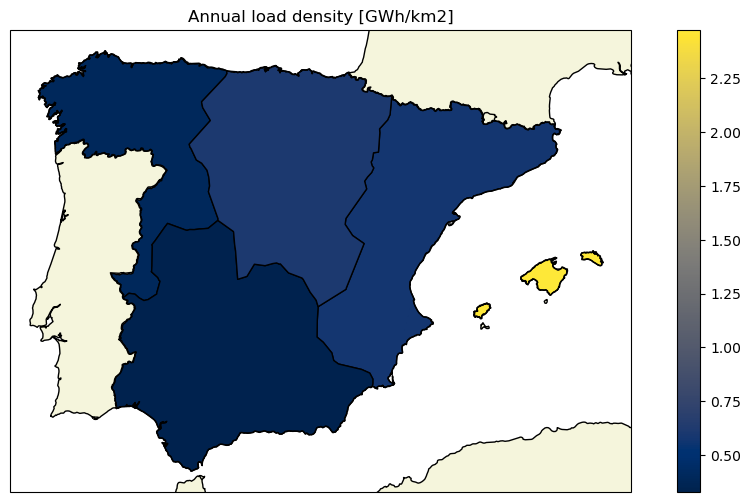

In [63]:
#################### Parameters

### Select feature (uncomment one of the following):
# feature = 'area' 
# feature = 'annual_load'
feature = 'annual_load_density'



#################### Local params
params_local = {}
params_local['vmin'] = ''   # Leave empty for automatic value 
params_local['vmax'] = ''   # Leave empty for automatic value



#################### Figure
fig_size = [12,6]
crs = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=fig_size, subplot_kw={'projection': crs})


### Add regions
xp.map_add_region(ax, gdf_regions_onshore, params['map_add_region'])

### Add map features
xp.map_add_features(ax, params['map_add_features'])

### Add network feature at regions
xp.map_network_loads_t(n, feature, ax, gdf_regions_onshore, params['map_network_loads_t'], params_local)

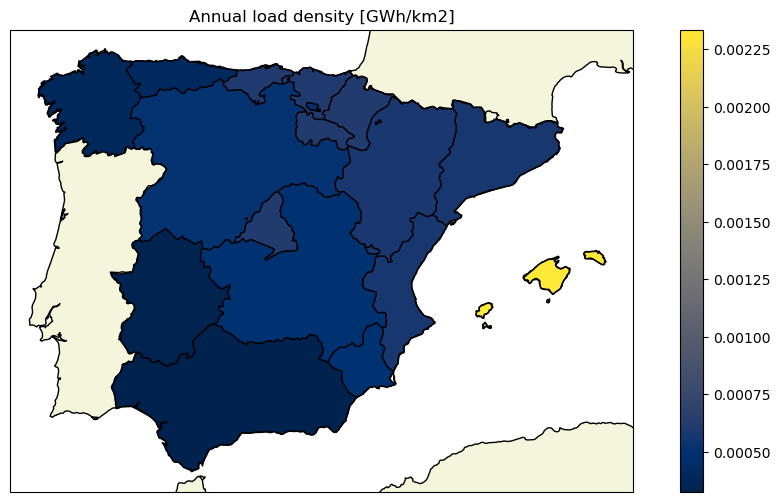

In [64]:
#################### Parameters

### Select NUTS level
NUTS_level = 2



#################### Local params
params_local = {}
params_local['vmin'] = ''   # Leave empty for automatic value 
params_local['vmax'] = ''   # Leave empty for automatic value



#################### Figure
fig_size = [12,6]
crs = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=fig_size, subplot_kw={'projection': crs})


### Define NUTS file
if NUTS_level==2:
    gdf_NUTS = gdf_NUTS2
if NUTS_level==3:
    gdf_NUTS = gdf_NUTS3    


### Add map features
xp.map_add_features(ax, params['map_add_features'])

### Add network feature aggregated at NUTS regions
xp.map_NUTS_loads_t(n, f'{feature}_NUTS', ax, gdf_regions, gdf_NUTS, params['map_NUTS_loads_t'], params_local)

### Variable: `n.storage_units`

Place `n.storage_units` in a dataFrame and show its content.

In [65]:
su = n.storage_units

su.head()

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,max_hours,efficiency_store,efficiency_dispatch,standing_loss,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
ES0 0 PHS,ES0 0,PQ,,2548.21,0.0,False,0.0,inf,-1.0,1.0,...,False,NaN,True,True,1179.320230,0.866025,0.866025,0.0,0.0,0.0
ES0 1 PHS,ES0 1,PQ,,4363.10,0.0,False,0.0,inf,-1.0,1.0,...,False,NaN,True,True,24.420054,0.866025,0.866025,0.0,0.0,0.0
ES0 2 PHS,ES0 2,PQ,,816.04,0.0,False,0.0,inf,-1.0,1.0,...,False,NaN,True,True,823.144139,0.866025,0.866025,0.0,0.0,0.0
ES0 3 PHS,ES0 3,PQ,,1143.40,0.0,False,0.0,inf,-1.0,1.0,...,False,NaN,True,True,6.464747,0.866025,0.866025,0.0,0.0,0.0
ES0 0 hydro,ES0 0,PQ,,7341.02,0.0,False,0.0,inf,0.0,1.0,...,False,NaN,True,True,1866.820300,0.000000,0.900000,0.0,0.0,0.0


#### Summary

What is the aggregated capacity per carrier? 

How many buses have storage units for each carrier? How many of them have zero capacity?

In [66]:
su.groupby('carrier').agg(
    Total_capacity=pd.NamedAgg(column='p_nom', aggfunc='sum'),
    Buses=pd.NamedAgg(column='p_nom', aggfunc='size'),
    Buses_zero_capacity=pd.NamedAgg(column='p_nom', aggfunc=lambda x: (x == 0).sum()),
    Buses_non_zero_capacity=pd.NamedAgg(column='p_nom', aggfunc=lambda x: (x != 0).sum()),
)

,Total_capacity,Buses,Buses_zero_capacity,Buses_non_zero_capacity
carrier,,,,
PHS,8870.750,4,0,4
hydro,14965.337,5,0,5


#### Maps

Plot a map showing a particular feature of a storage unit carrier at each region.

Then, show another map with the same information aggregated to a certain NUTS level (weighted with ovelap area).

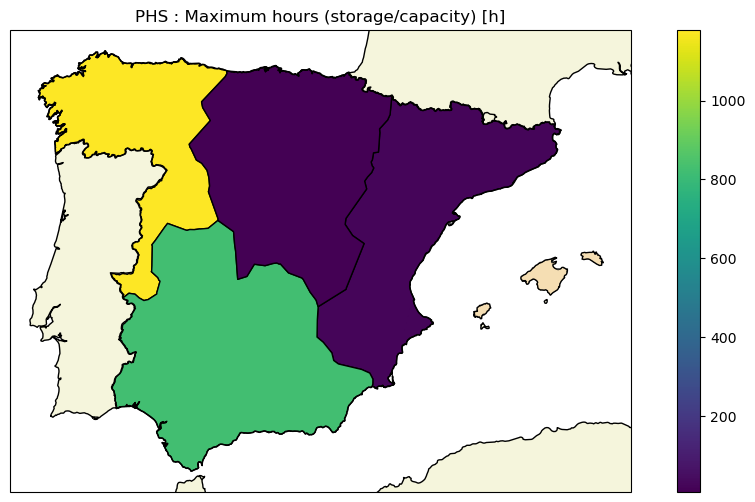

In [67]:
#################### Parameters

### Select carrier
carrier = 'PHS'

### Select feature (uncomment one of the following):
# feature = 'area' 
# feature = 'p_nom'
# feature = 'p_nom_density'
feature = 'max_hours'



#################### Local params
params_local = {}
params_local['vmin'] = ''   # Leave empty for automatic value 
params_local['vmax'] = ''   # Leave empty for automatic value



#################### Figure
fig_size = [12,6]
crs = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=fig_size, subplot_kw={'projection': crs})


### Add regions
xp.map_add_region(ax, gdf_regions_onshore, params['map_add_region'])

### Add map features
xp.map_add_features(ax, params['map_add_features'])

### Add network feature at regions
xp.map_network_storage_units(carrier, n, feature, ax, gdf_regions_onshore, params['map_network_storage_units'], params_local)

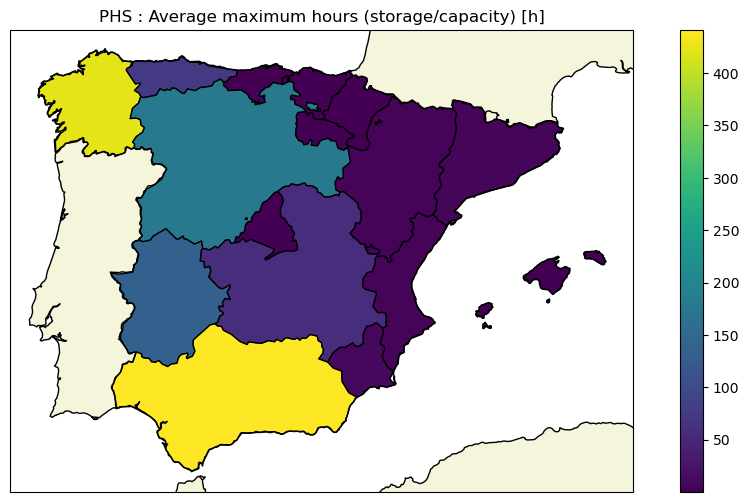

In [68]:
#################### Parameters

### Select NUTS level
NUTS_level = 2



#################### Local params
params_local = {}
params_local['vmin'] = ''   # Leave empty for automatic value 
params_local['vmax'] = ''   # Leave empty for automatic value



#################### Figure
fig_size = [12,6]
crs = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=fig_size, subplot_kw={'projection': crs})


### Define NUTS file
if NUTS_level==2:
    gdf_NUTS = gdf_NUTS2
if NUTS_level==3:
    gdf_NUTS = gdf_NUTS3    


### Add map features
xp.map_add_features(ax, params['map_add_features'])

### Add network feature aggregated at NUTS regions
xp.map_NUTS_storage_units(carrier, n, f'{feature}_NUTS', ax, gdf_regions, gdf_NUTS, params['map_NUTS_storage_units'], params_local)

#### Maximum hours

What is the relation between installed capacity and max. hours, for each carrier?

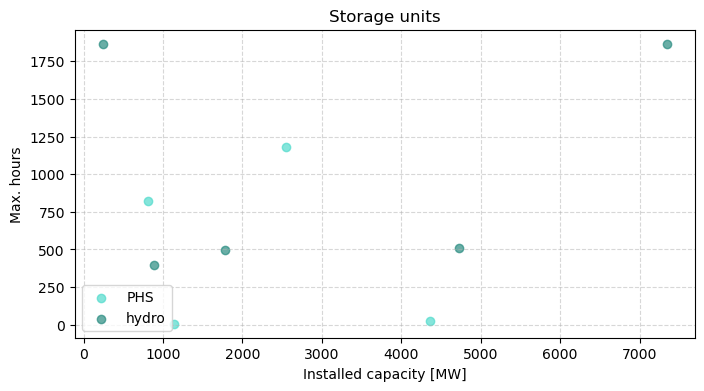

In [69]:
#################### Figure
fig_size = [8,4]
fig, ax = plt.subplots(figsize=fig_size)

tech_colors = n.carriers['color']

for carrier, group in su.groupby('carrier'):
    ax.scatter(group['p_nom'], group['max_hours'], label=carrier, color=tech_colors[carrier], alpha=0.7)

ax.set_xlabel('Installed capacity [MW]')
ax.set_ylabel('Max. hours')
ax.set_title('Storage units')
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()

### Variable: `n.stores`

Place `n.stores` in a dataFrame and show its content.

In [70]:
st = n.stores

st.head()

,bus,type,carrier,e_nom,e_nom_mod,e_nom_extendable,e_nom_min,e_nom_max,e_min_pu,e_max_pu,...,sign,marginal_cost,marginal_cost_quadratic,marginal_cost_storage,capital_cost,standing_loss,active,build_year,lifetime,e_nom_opt
Store,,,,,,,,,,,,,,,,,,,,,
ES0 0 H2,ES0 0 H2,,H2,0.0,0.0,True,0.0,inf,0.0,1.0,...,1.0,0.0,0.0,0.0,148.31893,0.0,True,0,inf,0.0
ES0 1 H2,ES0 1 H2,,H2,0.0,0.0,True,0.0,inf,0.0,1.0,...,1.0,0.0,0.0,0.0,148.31893,0.0,True,0,inf,0.0
ES0 2 H2,ES0 2 H2,,H2,0.0,0.0,True,0.0,inf,0.0,1.0,...,1.0,0.0,0.0,0.0,148.31893,0.0,True,0,inf,0.0
ES0 3 H2,ES0 3 H2,,H2,0.0,0.0,True,0.0,inf,0.0,1.0,...,1.0,0.0,0.0,0.0,148.31893,0.0,True,0,inf,0.0
ES1 0 H2,ES1 0 H2,,H2,0.0,0.0,True,0.0,inf,0.0,1.0,...,1.0,0.0,0.0,0.0,148.31893,0.0,True,0,inf,0.0
